In [ ]:
#LOGREG - jeszcze taka mini wizualizacja, jakie cechy on tutaj "faworyzuje"

c:\Users\66891\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\66891\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


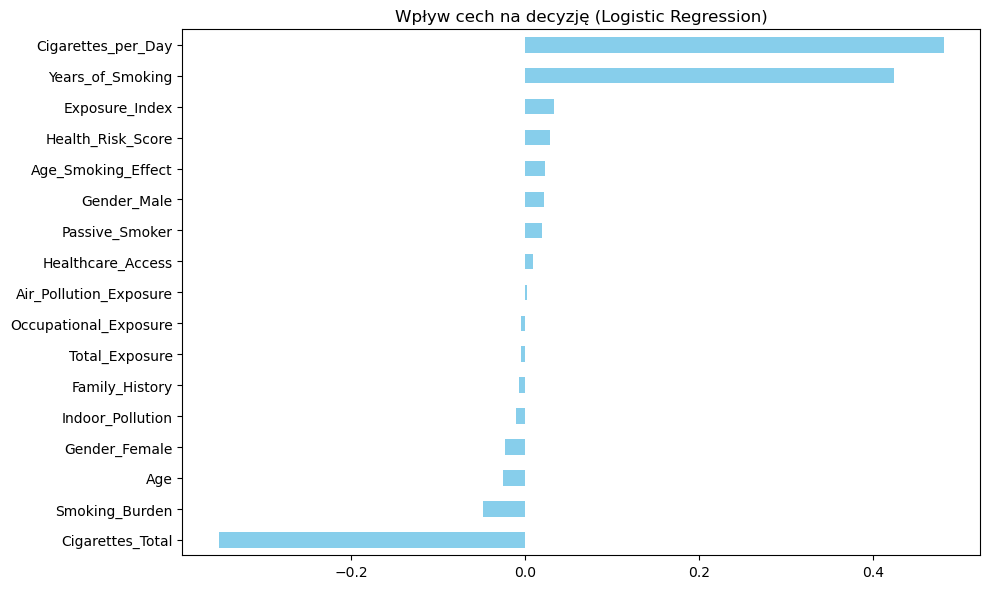

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns

df = pd.read_csv('learning_set.csv')
df.head()

# Zakładamy, że kolumna celu nazywa się:
target_column = 'Lung_Cancer_Diagnosis'

X = df.drop(columns=[target_column])
y = df[target_column]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,        # zachowujemy proporcje klas!
    random_state=42
)

params = {
'C': 0.01, 'fit_intercept': True, 'l1_ratio': 0.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'saga'


}

# Model
model = make_pipeline(StandardScaler(), LogisticRegression(**params))  # Wstaw własne C

model.fit(X_train, y_train)

# Wagi (β)
coef = model.named_steps['logisticregression'].coef_[0]
coef_df = pd.Series(coef, index=X.columns)

# Wizualizacja
plt.figure(figsize=(10, 6))
coef_df.sort_values().plot(kind='barh', color='skyblue')
plt.title("Wpływ cech na decyzję (Logistic Regression)")
plt.tight_layout()
plt.show()
